# **Insights on Fashion Industry**

# **# Group Member**
Manali Pangare
323075
22020094

Diksha Wagh
323076
22020099

Aboli  Jadhav
323082
22020258

Shubham Saraf  323062 21910628

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

In [ ]:

# Download the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the data (.csv) file
data = pd.read_csv("/content/drive/MyDrive/5th sem/Luxury_Products_Apparel_Data.csv")
data.head()

,Unnamed: 0,Category,SubCategory,ProductName,Description
0,8037,Accessories,Bags,"""Prada Striped Shell Belt Bag""","""One of Prada's most functional designs, this ..."
1,13670,Accessories,Socks,"""Falke - Lhasa Wool And Cashmere-blend Socks -...","""Falke - Casual yet luxurious, Falke's dark na..."
2,13983,Suits,Tuxedos,"""peak lapel tuxedo suit jacket""","""White and black linen blend peak lapel tuxedo..."
3,12081,Accessories,Gloves,"""Thom Browne Navy 4-Bar Rib Gloves""","""Pair of rib knit cashmere gloves in navy. Sig..."
4,15617,Accessories,Cufflinks,"""Alice Made This - Bayley Round Patina-brass C...","""Alice Made This - Made in the UK, these teal ..."


 # <span style="font-family:cursive;"> Initial insights around the data

<span style="font-family:cursive;"> **The data contains an Unnamed: 0, will do a simple value counts to check whether the column holds some information or is it just an identifier.**

In [ ]:
# Checking the Unnames: 0
data['Unnamed: 0'].value_counts()

10239    1
13007    1
13517    1
4850     1
12995    1
        ..
13366    1
11635    1
13684    1
7541     1
8192     1
Name: Unnamed: 0, Length: 5000, dtype: int64

<span style="font-family:cursive;"> **Each value has one count.**

In [ ]:
# Drop the column
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.head()

,Category,SubCategory,ProductName,Description
0,Accessories,Bags,"""Prada Striped Shell Belt Bag""","""One of Prada's most functional designs, this ..."
1,Accessories,Socks,"""Falke - Lhasa Wool And Cashmere-blend Socks -...","""Falke - Casual yet luxurious, Falke's dark na..."
2,Suits,Tuxedos,"""peak lapel tuxedo suit jacket""","""White and black linen blend peak lapel tuxedo..."
3,Accessories,Gloves,"""Thom Browne Navy 4-Bar Rib Gloves""","""Pair of rib knit cashmere gloves in navy. Sig..."
4,Accessories,Cufflinks,"""Alice Made This - Bayley Round Patina-brass C...","""Alice Made This - Made in the UK, these teal ..."


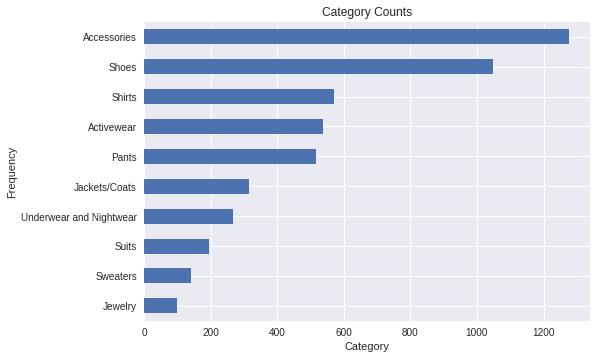

In [ ]:
# plot the frequency of each Category in the data
plt.style.use('seaborn')
data['Category'].value_counts().sort_values().plot(kind='barh')
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Category Counts")
plt.show()

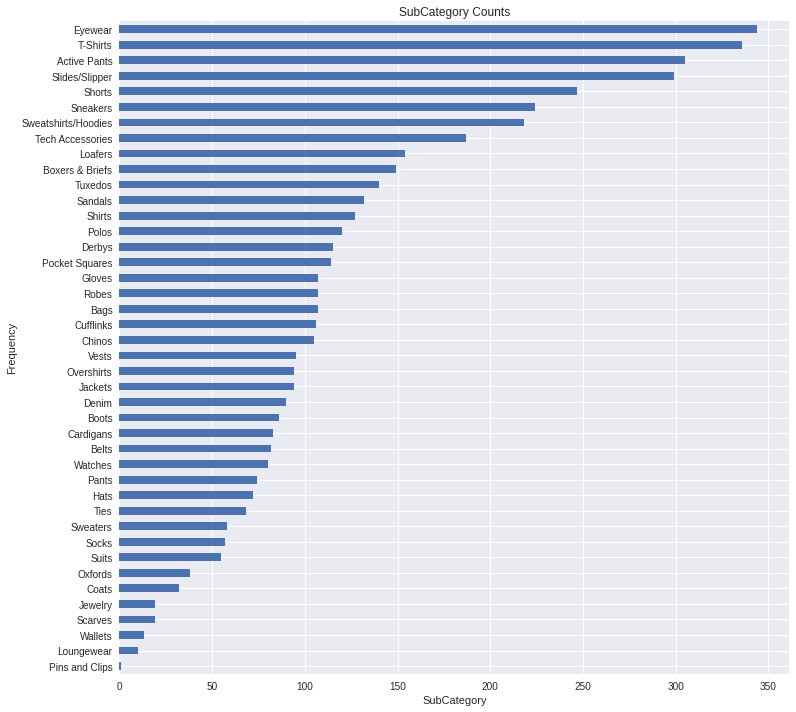

In [ ]:
# Plot the SubCategory Counts
plt.style.use('seaborn')
plt.figure(figsize=(12,12))
data['SubCategory'].value_counts().sort_values().plot(kind='barh')
plt.xlabel("SubCategory")
plt.ylabel("Frequency")
plt.title("SubCategory Counts")
plt.show()

In [ ]:
def clean_text_data(data):

  # Stopwords
  stp_words = stopwords.words('english')

  # Create the final string
  final_string = ""
  for word in data.values:
    final_string += word

  # Clean the text and remove the stopwords
  clean_text = []
  for word in final_string.split():
    if word not in stp_words:
      clean_text.append(word)

  # Join the clean text
  clean_string = " ".join(clean_text)

  return re.sub(r'[^\w]', ' ', clean_string)

# Extract the clean string from Product Name and Description
clean_product_name = clean_text_data(data['ProductName'])
clean_description_name = clean_text_data(data['Description'])

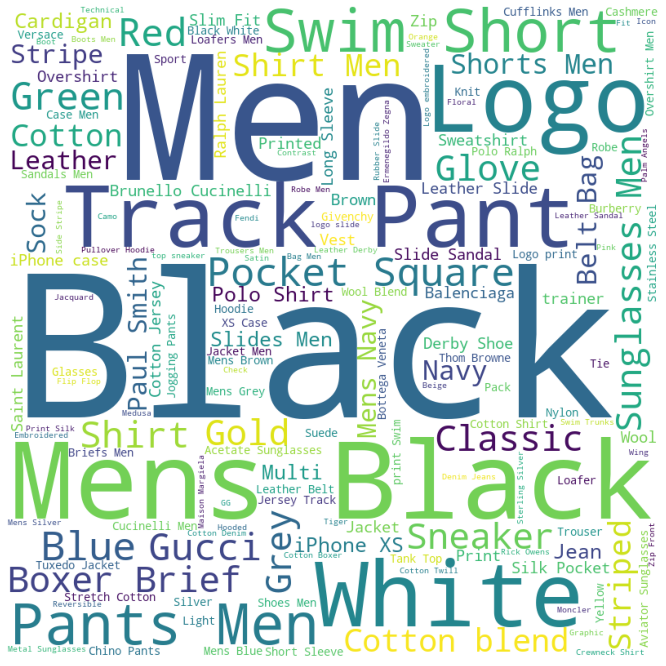

In [ ]:
# PLot the most occurring words in the Product Name
stp_words = stopwords.words('english')
plt.figure(figsize=(12,12))
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stp_words, min_font_size = 10).generate(clean_product_name)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

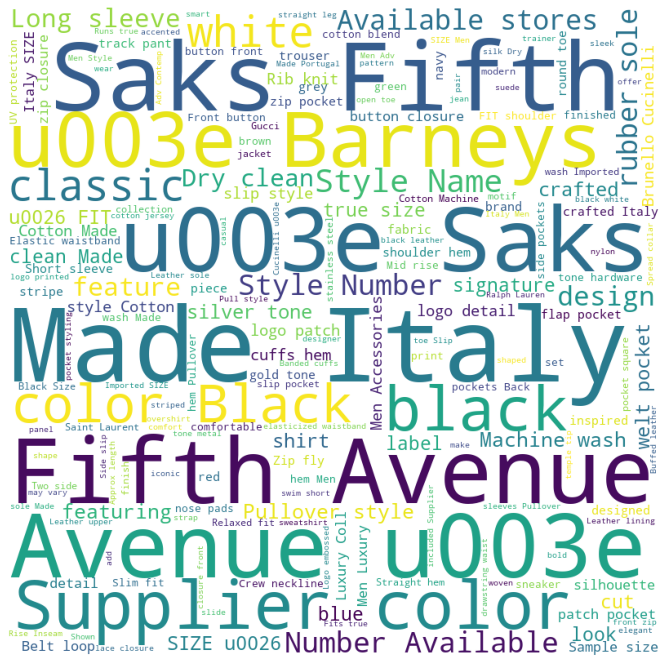

In [ ]:
# PLot the most occurring words in the Description
plt.figure(figsize=(12,12))
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stp_words, min_font_size = 10).generate(clean_description_name)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

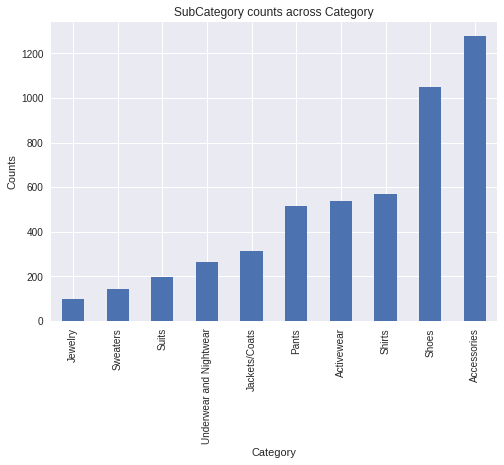

In [ ]:
# Subcategories across Categories
data.groupby('Category').count()['SubCategory'].sort_values().plot(kind='bar')
plt.ylabel("Counts")
plt.title("SubCategory counts across Category")
plt.show()

# <span style="font-family:cursive;"> Data Preprocessing

In [ ]:
# Copy the dataset
data_copy = data.copy()

In [ ]:
# Predicting Loafers and not Loafers
def SubCat_binarizer(x):

  '''
  if x is not Loafers encode other categories as Not Loafers
  '''
  if x != 'Loafers':
    x = 'Not Loafers'

  return x

# Apply the function on the copy dataset
data_copy['Target'] = data_copy['SubCategory'].apply(lambda x : SubCat_binarizer(x))

In [ ]:
data_copy.drop(['SubCategory'], axis=1, inplace=True)

In [ ]:
data_copy.head()

,Category,ProductName,Description,Target
0,Accessories,"""Prada Striped Shell Belt Bag""","""One of Prada's most functional designs, this ...",Not Loafers
1,Accessories,"""Falke - Lhasa Wool And Cashmere-blend Socks -...","""Falke - Casual yet luxurious, Falke's dark na...",Not Loafers
2,Suits,"""peak lapel tuxedo suit jacket""","""White and black linen blend peak lapel tuxedo...",Not Loafers
3,Accessories,"""Thom Browne Navy 4-Bar Rib Gloves""","""Pair of rib knit cashmere gloves in navy. Sig...",Not Loafers
4,Accessories,"""Alice Made This - Bayley Round Patina-brass C...","""Alice Made This - Made in the UK, these teal ...",Not Loafers


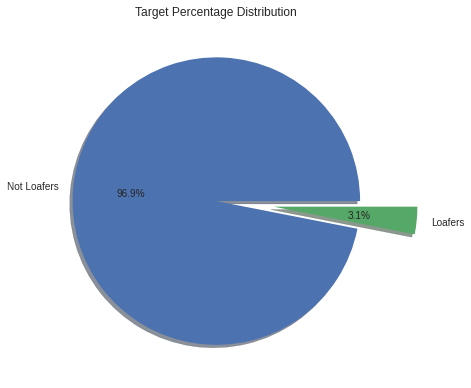

In [ ]:
# Visualise the distribution of Target variable
labels = data_copy['Target'].value_counts().index
plt.pie(data_copy['Target'].value_counts(), labels=labels, explode=(0.0, 0.4), autopct="%1.1f%%", shadow=True)
plt.title("Target Percentage Distribution")
plt.tight_layout()
plt.show()

In [ ]:
# Encode the Target and Category
le = LabelEncoder()
data_copy['Category'] = data_copy['Category'].astype('str')
data_copy['Category'] = le.fit_transform(data_copy['Category'])

In [ ]:
# Encode the Target
encode_target = {'Not Loafers' : 0, 'Loafers' : 1}
data_copy['Target'] = data_copy['Target'].apply(lambda x : encode_target[x])

In [ ]:
# create a function to tokenize the data
def preprocess_data(data):
  
  # 1. Tokenization
  tk = RegexpTokenizer('\s+', gaps = True)
  text_data = [] # List for storing the tokenized data
  for values in data.values:
    tokenized_data = tk.tokenize(values) # Tokenize the news
    text_data.append(tokenized_data) # append the tokenized data

  # 2. Stopword Removal

  # Extract the stopwords
  sw = stopwords.words('english')
  clean_data = [] # List for storing the clean text
  # Remove the stopwords using stopwords
  for data in text_data:
    clean_text = [words.lower() for words in data if words.lower() not in sw]
    clean_data.append(clean_text) # Appned the clean_text in the clean_data list
  
  # 3. Stemming

  # Create a stemmer object
  ps = PorterStemmer()
  stemmed_data = [] # List for storing the stemmed data
  for data in clean_data:
    stemmed_text = [ps.stem(words) for words in data] # Stem the words
    stemmed_data.append(stemmed_text) # Append the stemmed text
  

  # 4. tfidf vectorizer --> Term Frequency Inverse Document Frequency
  
  # Flatten the stemmed data

  updated_data = []
  for data in stemmed_data:
    updated_data.append(" ".join(data))

  # TFID Vector object
  tfidf = TfidfVectorizer()
  tfidf_matrix = tfidf.fit_transform(updated_data)

  return tfidf_matrix

In [ ]:
# Preprocess the above function
text_data = (data_copy['Description'] + data_copy['ProductName'])
tfidf_matrix = preprocess_data(text_data).toarray()

In [ ]:
# Prepare the final set
final_train = np.concatenate((data_copy['Category'].values.reshape(-1,1), tfidf_matrix), axis=1)
target = data_copy['Target']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(final_train, target, test_size=0.2, random_state=42)

# <span style="font-family:cursive;"> Classification Tasks

In [ ]:
# Plot the confusion matrix
def plot_confusion_matrix(model, model_name, X_test=X_test, y_test=y_test):
  predictions = model.predict(X_test)
  cnf_matrix = confusion_matrix(y_test, predictions)
  sns.heatmap(cnf_matrix, annot=True, cbar=False, fmt='.2f', cmap='Blues')
  plt.xlabel("Predicted Label")
  plt.ylabel("Actual Label")
  plt.title("{} Confusion Matrix".format(model_name))
  plt.show()

In [ ]:
def print_f1_score(model, model_name, X_test=X_test, y_test=y_test):

  # Make Predicitons
  predcitions_2 = model.predict(X_test)

  # Print the f1 score
  f1 = f1_score(y_test, predcitions_2)
  print("F1 score for the  {} model : {:.4f}".format(model_name, f1))
  return f1

In [ ]:
# 1. Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Print the f1 score
nb_f1 = print_f1_score(model = mnb, model_name='Naive Bayes')

F1 score for the  Naive Bayes model : 0.0000


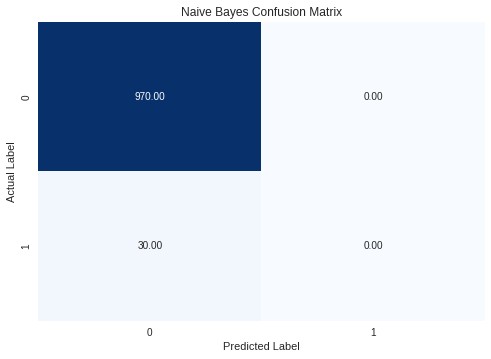

In [ ]:
# Plot the confusion matrix
plot_confusion_matrix(model=mnb, model_name='Naive Bayes')

In [ ]:
# 2. Logistic Regression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# print the f1 score
lr_f1 = print_f1_score(model=lr_clf, model_name='Logistic Regression')

F1 score for the  Logistic Regression model : 0.5714


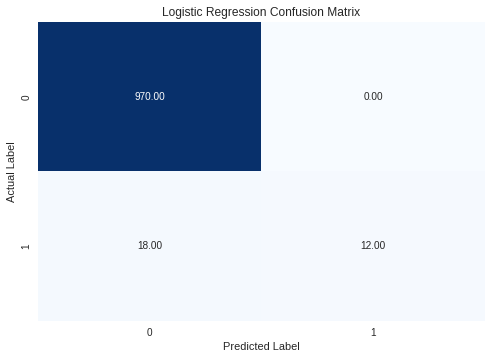

In [ ]:
# Plot the confusion matrix
plot_confusion_matrix(model=lr_clf, model_name="Logistic Regression")

In [ ]:
# 3. Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Print the f1 score
dt_f1 = print_f1_score(model=dt_clf, model_name='Decision Tree')

F1 score for the  Decision Tree model : 0.9677


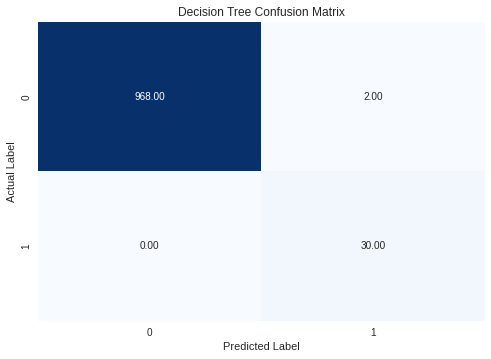

In [ ]:
# Plot the Confusion Matrix
plot_confusion_matrix(model=dt_clf, model_name='Decision Tree')

In [ ]:
# 4. Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Print the f1 score
rf_f1 = print_f1_score(model=rf_clf, model_name='Random Forest')

F1 score for the  Random Forest model : 0.8235


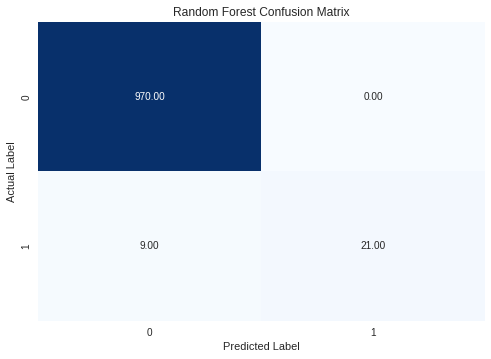

In [ ]:
# Plot the confusion matrix
plot_confusion_matrix(model=rf_clf, model_name='Random Forest')

In [ ]:
# Compare the models
combine_f1 = np.array([[nb_f1], [lr_f1], [dt_f1], [rf_f1]])
combine_f1_df = pd.DataFrame(combine_f1, 
                             index=['Naive Bayes','Logistic Regression', 'Decision Tree', 'Random Forest'], 
                             columns=["F1 Score"]).sort_values(by='F1 Score', ascending=False)
combine_f1_df

,F1 Score
Decision Tree,0.967742
Random Forest,0.823529
Logistic Regression,0.571429
Naive Bayes,0.000000


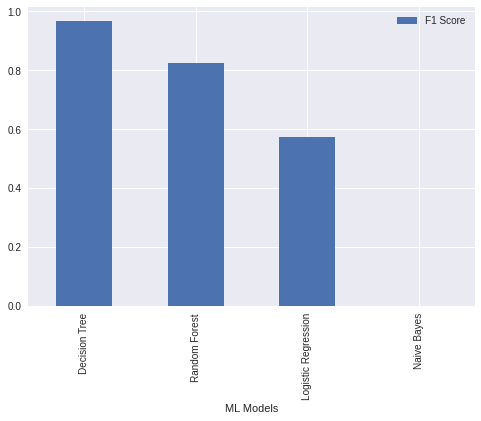

In [ ]:
# plot the results
combine_f1_df.plot(kind='bar')
plt.xlabel("ML Models")
plt.show()

<span style="font-family:cursive;"> **Decision Tree maximizes the F1 Score for the test set. Checking it's performance on the train set to check whether the results are generalized or not.**

In [ ]:
print("F1 Score of Decision Tree model on the train set {:.4f}".format(f1_score(y_train, dt_clf.predict(X_train))))

F1 Score of Decision Tree model on the train set 0.9878


<span style="font-family:cursive;">**The model seem to generalise on both the train and the test data.**

In [ ]:
data.head()

# Extract the text data
text_data_2  = (data['SubCategory'].astype('str') + data['ProductName'] + data['Description'])
train_data_2 = preprocess_data(text_data_2).toarray()

# Target 
le = LabelEncoder()
target_2 = le.fit_transform(data['Category'].astype('str'))

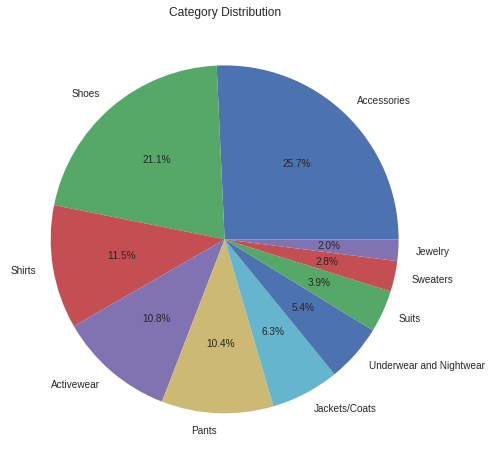

In [ ]:
plt.figure(figsize=(12,8))
labels = data['Category'].value_counts().index
plt.pie(data['Category'].value_counts(), labels=labels, autopct="%1.1f%%")
plt.title("Category Distribution")
plt.show()

<span style="font-family:cursive;"> **Imbalanced distribution of classes.**

In [ ]:
# Function to compute Micro/Macro F1 score
def print_micro_macro_f1(model, model_name, X_test=X_test, y_test=y_test):

  # make predictions
  predictions = model.predict(X_test)
  
  # 1. Compute f1 macro
  f1_macro = f1_score(y_test, predictions, average='macro')

  # 2. Compute the f1 micro 
  f1_micro = f1_score(y_test, predictions, average='micro')

  print("F1 Micro for the {} : {:.3f}".format(model_name, f1_micro))
  print("F1 Macro for the {} : {:.3f}".format(model_name, f1_macro))

  return f1_macro, f1_micro

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(train_data_2, target_2, test_size=0.2, random_state=42)

In [ ]:
# 1. Naive Bayes
mnb_2 = MultinomialNB()
mnb_2.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Print the f1 score
mnb_f1_macro, mnb_f1_micro = print_micro_macro_f1(model=mnb_2, model_name='Naive Bayes', X_test=X_test, y_test=y_test)

F1 Micro for the Naive Bayes : 0.872
F1 Macro for the Naive Bayes : 0.658


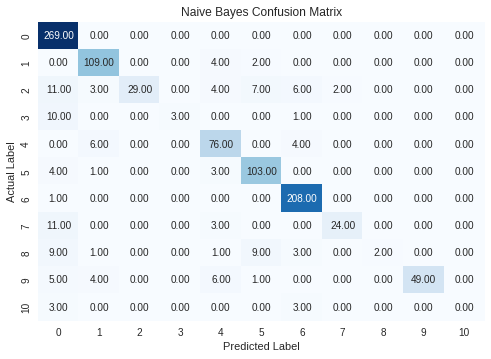

In [ ]:
# Plot the Confusion Matrix
plot_confusion_matrix(model=mnb_2, model_name='Naive Bayes', X_test=X_test, y_test=y_test)

In [ ]:
# 2. Logistic Regression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Print the f1 score
lr_f1_macro, lr_f1_micro = print_micro_macro_f1(model=lr_clf, model_name='Logistic Regression', X_test=X_test, y_test=y_test)

F1 Micro for the Logistic Regression : 0.973
F1 Macro for the Logistic Regression : 0.925


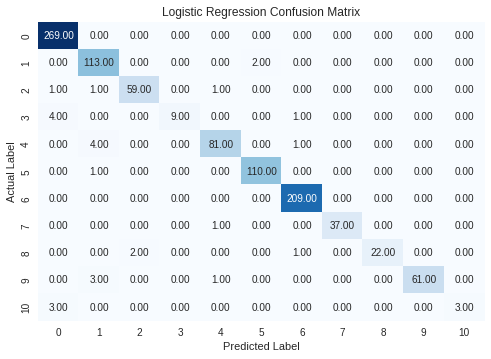

In [ ]:
# Plot the confusion matrix
plot_confusion_matrix(model=lr_clf, model_name="Logistic Regression", X_test=X_test, y_test=y_test)

In [ ]:
# 3. Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Print the f1 score
dt_f1_macro, dt_f1_micro = print_micro_macro_f1(model=dt_clf, model_name='Decision Tree', X_test=X_test, y_test=y_test)

F1 Micro for the Decision Tree : 0.973
F1 Macro for the Decision Tree : 0.969


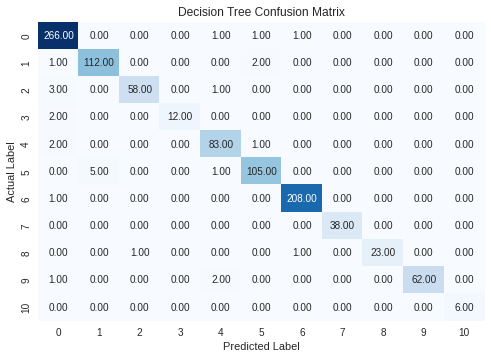

In [ ]:
# Plot the confusion matrix
plot_confusion_matrix(model=dt_clf, model_name='Decision Tree', X_test=X_test, y_test=y_test)

In [ ]:
# 4. Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Print the f1 score
rf_f1_macro, rf_f1_micro = print_micro_macro_f1(model=rf_clf, model_name='RandomForest', X_test=X_test, y_test=y_test)

F1 Micro for the RandomForest : 0.979
F1 Macro for the RandomForest : 0.954


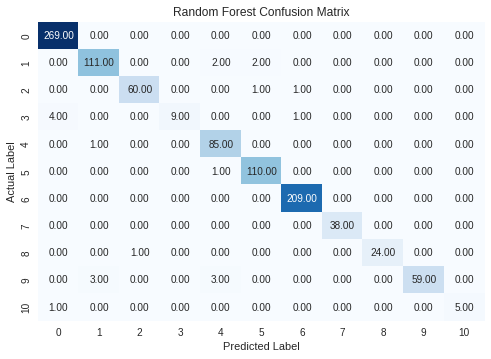

In [ ]:
# Plot the confusion matrix
plot_confusion_matrix(model=rf_clf, model_name='Random Forest', X_test=X_test, y_test=y_test)

In [ ]:
# Compare the models
results = np.array([[mnb_f1_macro, mnb_f1_micro], 
                    [lr_f1_macro, lr_f1_micro], 
                    [dt_f1_macro, dt_f1_micro],
                    [rf_f1_macro, rf_f1_micro]])

results_df = pd.DataFrame(results, 
                          index=['Naive Bayes', 
                                  'Logistic Regression', 
                                  'Decision Tree', 
                                  'Random Forest'], 
                          columns=['Macro_F1', 
                                    'Micro_F1']).sort_values(by='Micro_F1', ascending=False)
results_df

,Macro_F1,Micro_F1
Random Forest,0.953851,0.979
Logistic Regression,0.924638,0.973
Decision Tree,0.969049,0.973
Naive Bayes,0.658388,0.872
